# M4 : Data Transforms and Dimantionality Reduction

## Scaling
Techinique used for convert all the input variables to vary within a similar range of values.

1. Normalization: eg. MinMaxScaler - range (-1,1) or (0,1) - outlier effect still remains the same.       
    x_new = (x - xmin)/(xmax - xmin)
                  
2. Standardization: eg. Standard Scaler - range is variable, mean 0 and std of 1. - outliers are considered and skews and bell curve.        
    x_new = (x - mean)/(std)
               
3. Robust Scaler: eg. RobustScaler - bell curve with outliers scaled to be outliers in the shrinked range. bell curve is not skewed.         
    x_new = (x - median)/(Q75 - Q25)

### Robust Scaler

In [67]:
from sklearn.preprocessing import RobustScaler
from sklearn.datasets import make_classification
from sklearn.datasets import load_diabetes

X, y  = make_classification(n_samples = 1000, n_features = 20, 
                            n_informative = 10, n_classes = 4)

scaler = RobustScaler(with_centering=True, with_scaling=True)
X = scaler.fit_transform(X)

# diabetes
X, y = load_diabetes(return_X_y=True, as_frame = True)
X = scaler.fit_transform(X)


## Encoding

1. Ordinal encoding: OrdinalEncoder - natural order preserved, LabelEncoder - for single feature or target variable.
2. Nominal Encoding: OneHotEncoder - no order, Dummy Variable Encoding - removes redundancy to dome extent
3. Discretization: encoding continuos numerical values to ranked bins of discrete numbers.           
    Eg. a numerical variable between 1 and 10 can be divided into an ordinal variable with 5 labels with an ordinal relationship 1 2 3 4 5 7 8 9 10 This is called Discretization


In [68]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder
from sklearn.preprocessing import KBinsDiscretizer
import numpy as np, pandas as pd

X = np.array([['red'],['blue'],['green']])
encoder = OrdinalEncoder()
X_ = encoder.fit_transform(X)
print(X_)

[[2.]
 [0.]
 [1.]]


In [69]:
encoder = OneHotEncoder(sparse = False)
X_ = encoder.fit_transform(X)
print(X_)

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]]


c:\Users\kruth\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [70]:
encoder = OneHotEncoder(sparse=False, drop = 'first')
X_ = encoder.fit_transform(X)
print(X_)

[[0. 1.]
 [0. 0.]
 [1. 0.]]


c:\Users\kruth\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [71]:
encoder = LabelEncoder()
X_ = encoder.fit_transform(X)
print(X_)

[2 0 1]


c:\Users\kruth\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Making distributions more Guassian
Removes skewness in the distribution      
Using PowerTransformer class:              
We can apply a power transform directly by calculating the log or squareroot of the variable.       
lambda values: 0.0 for log, -0.5 for reciprocal squareroot, 0.5 for squareroot, etc.         
Methods: 'box-cox' and 'yeo-johnson'

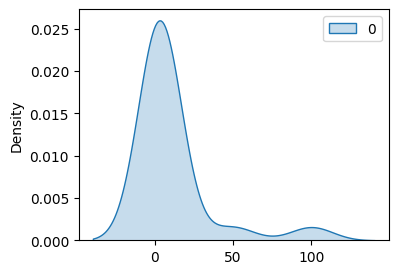

In [72]:
from sklearn.preprocessing import PowerTransformer
X, y  = make_classification(n_samples = 1000, n_features = 20, 
                            n_informative = 10, n_classes = 4)
data = np.array([1, 2, 5, 6, 3, 1, 1, 7, 2, 2, 2, 3, 1, 1, 2, 8, 10, 50,100])
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (4,3))
sns.kdeplot(data.reshape(-1,1), fill = True)
plt.show()

trans = PowerTransformer(method = 'yeo-johnson', standardize=True)
X_ = trans.fit_transform(data.reshape(-1,1))

# box-cox is strictly applied to pos values.
trans2 = PowerTransformer(method = 'box-cox', standardize=True)
X_2 = trans2.fit_transform(data.reshape(-1,1))

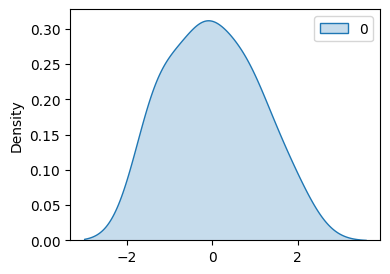

In [73]:
plt.figure(figsize = (4,3))
sns.kdeplot(X_2, fill = True)
plt.show()

## Changing Numerical Data Distributions

Quantile Trasform:        
The quantile function ranks or smooths out the relationship between observations
and can be mapped onto other distributions, such as the uniform or normal
distribution.

In [74]:
data = data.reshape(-1,1)
from sklearn.preprocessing import QuantileTransformer
trans = QuantileTransformer(n_quantiles=10, output_distribution='uniform')
X_ = trans.fit_transform(data)

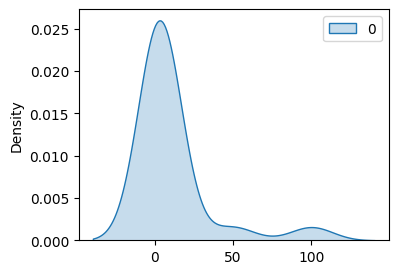

In [75]:
plt.figure(figsize = (4,3))
sns.kdeplot(data, fill = True)
plt.show()

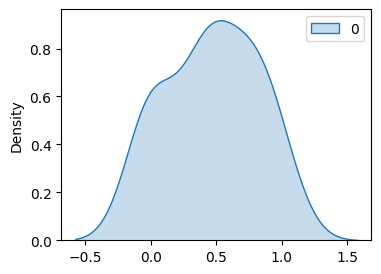

In [76]:
plt.figure(figsize = (4,3))
sns.kdeplot(X_, fill = True)
plt.show()

In [77]:
trans = QuantileTransformer(n_quantiles=10, output_distribution='normal')
X_ = trans.fit_transform(data)

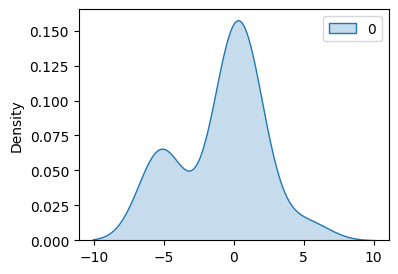

In [78]:
plt.figure(figsize = (4,3))
sns.kdeplot(X_, fill = True)
plt.show()

## Feature Engineering and Dimentionslity Reduction

### Polynomial Features

A squared or cubed version of an input variable will change the
probability distribution, separating the small and large values, a
separation that is increased with the size of the exponent
               
This separation can help some machine learning algorithms make
better predictions and is common for regression predictive modeling
tasks and generally tasks that have numerical input variables
                    
Typically linear algorithms, such as linear regression and logistic
regression, respond well to the use of polynomial input variables

Generate a new feature matrix consisting of all polynomial combinations
 |  of the features with degree less than or equal to the specified degree.
 |  For example, if an input sample is two dimensional and of the form
 |  [a, b], the degree-2 polynomial features are [1, a, b, a^2, ab, b^2].

In [79]:
from sklearn.preprocessing import PolynomialFeatures
trans = PolynomialFeatures(degree = 2) # will add 2 varibles for each input
print(X.shape)
X_ = trans.fit_transform(X)
print(X_.shape)

(1000, 20)
(1000, 231)


### Feature Selection

1. Wrapper method: Recursive Feature Elimination - wrapping a ML model and testing with different subsets of features.           
2. Filter method: Pearson's Correlation and Chi-squared test - scoring methods - most predictive features. 


### Matrix Factorisation

1. EigenDecomposition
2. SingularValueDecomposition
3. PrincipalComponentAnalysis


### Manifold Learning

Techniques from linear algebra can be used for dimensionality reduction           
These techniques are sometimes referred to as manifold learning and are used to
create a low dimensional projection of high dimensional data, often for the
purposes of data visualization

      
Examples of manifold learning techniques include 
- Kohonen Self Organizing Map ( SOM)
- Sammons Mapping 
- Multidimensional Scaling ( MDS)
- t distributed Stochastic Neighbor Embedding (t SNE)

### Autoencoder Method

Autoencoders involves in framing a self supervised learning problem
where a model must reproduce the input correctly

A network model is used that seeks to compress the data flow to a
bottleneck layer with far fewer dimensions than the original input data

The part of the model prior to and including the bottleneck is referred
to as the encoder, and the part of the model that reads the bottleneck
output and reconstructs the input is called the decoder

### Linear Discriminant Analysis
Specifically the model seeks to find a linear combination of input
variables that achieves the maximum separation for samples between
classes (class centroids or means) and the minimum separation of
samples within each class

In [83]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
y = np.array([1, 1, 1, 2, 2, 2])
clf = LinearDiscriminantAnalysis()
clf.fit(X, y)
res = clf.transform(X)
print(res)

[[-1.73205081]
 [-1.73205081]
 [-3.46410162]
 [ 1.73205081]
 [ 1.73205081]
 [ 3.46410162]]


THE END